In [ ]:
# Splitting a Dataset into Training and Testing Sets

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk] # 80% of the Entire Dataset will be for Training
test = cdf[~msk]

# Training a Linear Regression Model

## Creating the Training and Testing Set

train_x = train[["FUELCONSUMPTION_COMB"]]
test_x = test[["FUELCONSUMPTION_COMB"]]

## Training the Linear Regression Model Onto It

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
print(regr.coef_)
print(regr.intercept_)

## Find the Model's Predictions

print(regr.predict(test_x))

## Evaluation Metrics to Calculate the Accuracy of a Regression Model

from sklearn.metrics import r2_score

predictions = regr.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))
print("Residual Sum of Squares (MSE): %.2f" % np.mean((predictions - test_y) ** 2))
print("R2-Score: %.2f" % r2_score(test_y , predictions) )

## Multiple Linear Regression

In [ ]:
# After Creating Training and Testing Data, Calculating the Coefficients of Each Feature

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_) ## Will Give Respective Coefficient Value for Each Feature (Independent Variable) in "x"

# Prediction:

y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

## K-Nearest Neighbors (KNN):

In [ ]:
# Preparing Data:

# Converting Pandas DataFrame to a NumPy Array

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)

# Data Normalization/Standardization

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# Train/Test/Split to Improve Out-of-Sample Accuracy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
# Classification - KNN

# Import Library

from sklearn.neighbors import KNeighborsClassifier

# Training

k = 4 ## Starting the Algorithm with Arbitrary "4" Value
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Using the Model to Make Predictions on the Test Set

yhat = neigh.predict(X_test)

# Accuracy Evaluation/Jaccard Score/Accuracy Classification Score
## Calculates How Closely the Actual Labels and Predicted Labels are Matched in the Test Set

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

K, in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

In [ ]:
# We can Calculate the Accuracy of KNN for Different Values of "k"

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

# Then, Plot the Model Accuracy for a Different Number of Neighbors

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show() ## The Result:

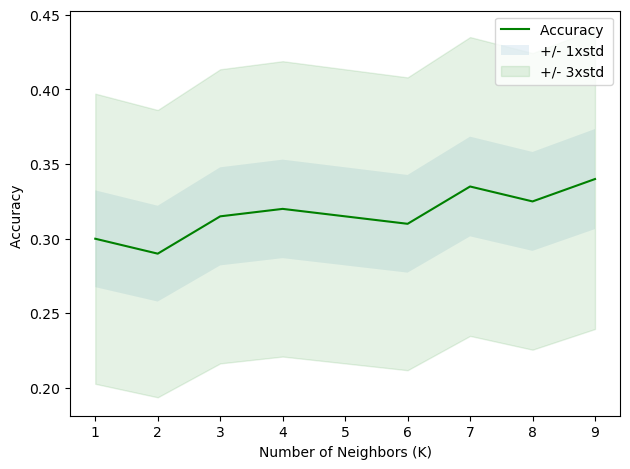

## Decision Trees:

In [ ]:
# After Downloading the Data, Pre-Processing:

X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values ## Feature Matrix - the Data

# Converting Categorical Features - like 'Sex' and 'BP' - into Numerical Ones

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

# Now, We can Fill the Target Variable

y = my_data["Drug"]

In [ ]:
# Using and Setting Up Train/Test/Split

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Modeling

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) ## Create an Instance of the Classifier
## "criterion = 'entropy'"" Ensures we See the Information Gain of Each Node

drugTree.fit(X_trainset,y_trainset) ## Fit the Data

predTree = drugTree.predict(X_testset) ## Making Some Predictions and Storing Them in the "predTree" Variable

# (Optional): Print Out to Visually Compare Predictions to Actual Values
print (predTree [0:5])
print (y_testset [0:5])


# Model Evaluation

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

# Visualizing the Tree

from sklearn.tree import export_graphviz
export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

## Logistic Regression:

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

ℎ𝜃(𝑥)=𝜎(𝜃𝑇𝑋)=𝑒(𝜃0+𝜃1𝑥1+𝜃2𝑥2+...)1+𝑒(𝜃0+𝜃1𝑥1+𝜃2𝑥2+⋯)
 
Or:
𝑃𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦𝑂𝑓𝑎𝐶𝑙𝑎𝑠𝑠1=𝑃(𝑌=1|𝑋)=𝜎(𝜃𝑇𝑋)=𝑒𝜃𝑇𝑋1+𝑒𝜃𝑇𝑋
 
In this equation,  𝜃𝑇𝑋
  is the regression result (the sum of the variables weighted by the coefficients), exp is the exponential function and  𝜎(𝜃𝑇𝑋)
  is the sigmoid or logistic function, also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

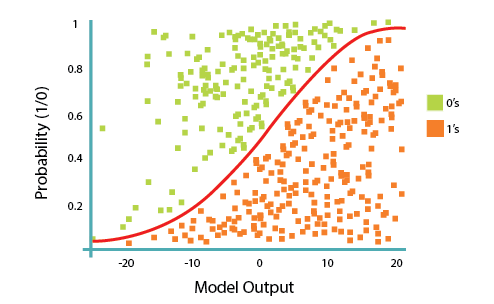

The objective of the Logistic Regression algorithm, is to find the best parameters θ, for  ℎ𝜃(𝑥)
  =  𝜎(𝜃𝑇𝑋)
 , in such a way that the model best predicts the class of each case.

In [ ]:
# After Loading in Data

## Data Pre-Processing and Features Selection for Modeling

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int') ## Target Data Type has to be "int"

# Defining X and Y for the Dataset

X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])

# Normalizing the Dataset

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train/Test Split on Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# Modeling (Logistic Regression with Scikit-learn)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_test)

# Returning Estimates for all Classes

yhat_prob = LR.predict_proba(X_test)

# Evaluation

## Jaccard Index - Accuracy Evaluation; Closer to 1.0 = Higher Accuracy

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

## Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

### Compute Confusion Matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

### Matrix Classification Report
print (classification_report(y_test, yhat)) ### Can be Used to Calculate Precision and Recall

### Log Loss - for Evaluation
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

### Plot Non-Normalized Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix') ### Result:

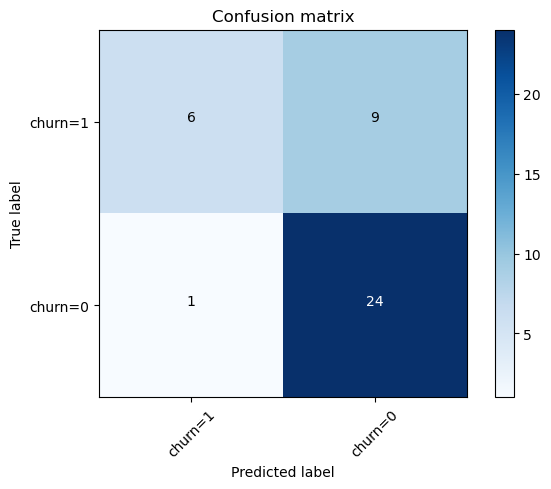

## Support Vector Machine:

In [ ]:
# After Loading in Data, Looking at the Distribution of the Classes based on Clump thickness and Uniformity of cell size:

ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

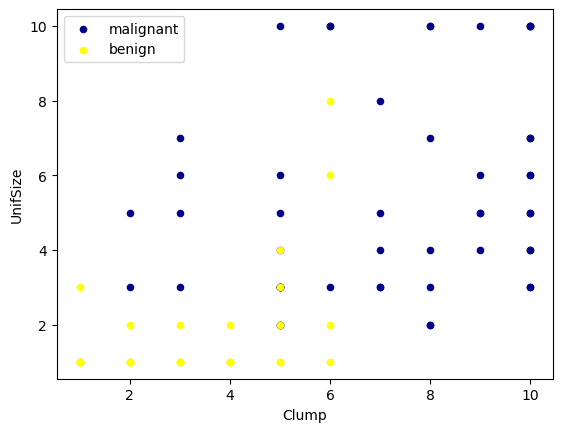

In [ ]:
# Preparing Data - Making Sure All Usable Rows have Numerical Values only

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

# The Target Variable we want to Predict for

y = np.asarray(cell_df['Class'])

# Train/Test Dataset Split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Modeling - Kernelling for Processing

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhat = clf.predict(X_test)

# Evaluation

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
## Compute Confusion Matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix') ## Result:

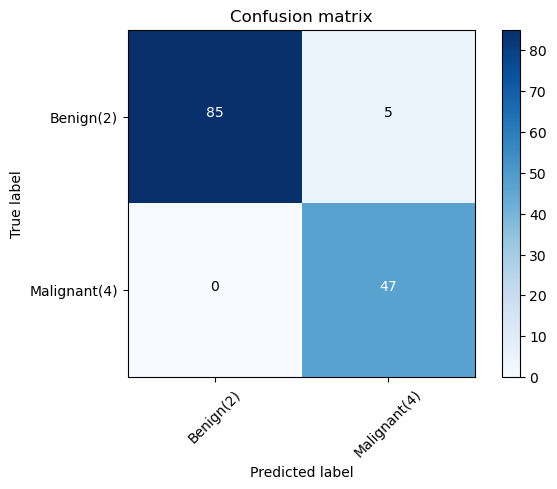

In [ ]:
# F1 Score

from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

# Jaccard Index

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

## K-Means Clustering:

### Clustering for Segmentation:
Using the Available Data to Understand and Identify how Customers are Similar to each other. For example:
- Identifying and Clustering all Customers who are High-Profit and Low-Risk, as "Good and to Keep."
- Identifying and Clustering all Customers who are Low-Profit and More Likely to Leave, as "To let go."
- Identifying Buying Patterns of Customers, in Retail/Marketing.

### Example Scenario:
#### You have a Dataset and you want to Apply Customer Segmentation on the Historical Data.
^K-Means can Group Data - only Unsupervised - Based on the Similarity of Customers to Each Other.

### Load in the Data:

np.random.seed(0)

Next we will be making **random clusters of points by using the "make_blobs" class**. The make_blobs class can take in many inputs, but we will be using these specific ones.

Input

n_samples: The total number of points equally divided among clusters.
Value will be: 5000
centers: The number of centers to generate, or the fixed center locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
cluster_std: The standard deviation of the clusters.
Value will be: 0.9

Output
X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

In [ ]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [ ]:
# Display the Scatterplot of the Randomly Generated Data

plt.scatter(X[:, 0], X[:, 1], marker='.')

### Setting Up K-Means:
#### Now that we have our Random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [ ]:
# Initializing K-Means with These^ Parameters

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [ ]:
# Fitting the K-Means Model with the Feature Matrix that was Created ("X")

k_means.fit(X)

# Grabbing the Labels for Each Point in the Model

k_means_labels = k_means.labels_
k_means_labels

# Getting the Coordinates of the Cluster Centers

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

In [ ]:
# We have Random Data Generated and the K-Means Model Initialized
# Let's Plot!

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

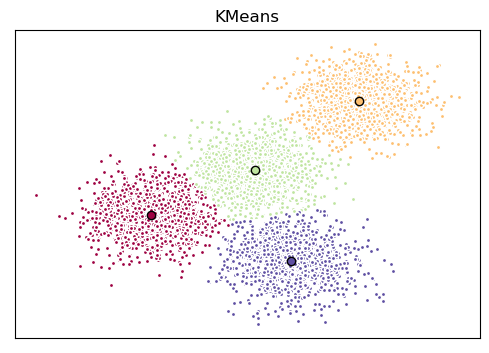

### Customer Segmentation with K-Means:

In [ ]:
# After Loading in Data and Pre-Processing to Remove any Unneeded Categorical Variables:

## 1: Normalize the Dataset - Normalizing Over the Standard Deviation

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

## 2: Modeling - Applying K-Means on our Dataset

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

## 3: Insights - Assign the Labels to Each Row in the Dataframe

df["Clus_km"] = labels
df.head(5)

## (Checking the Centroid Values by Averaging the Features in Each Cluster)

df.groupby('Clus_km').mean()

## (Looking at the Distribution of Customers Based on Their Age and Income)

### Plot 1:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

### Plot 2:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

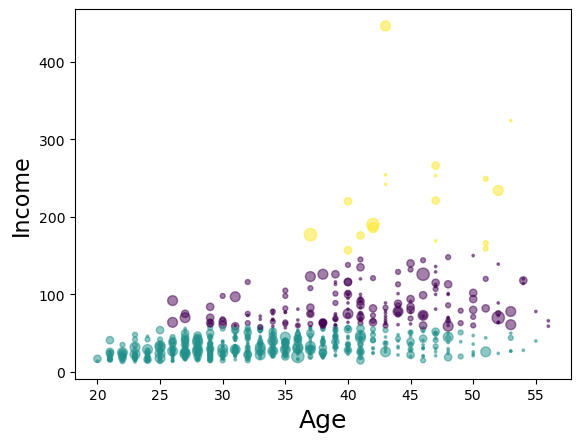

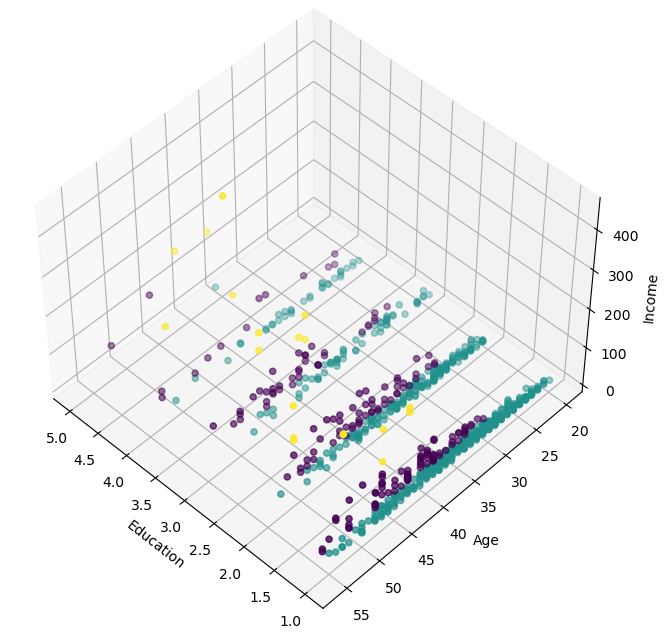

^K-Means will Partition your Customers into Mutually Exclusive groups - for example, into 3 Clusters. The Customers in each Cluster are similar to each other Demographically.
Now we can create a Profile for each group, considering the common characteristics of each Cluster. 
For example, the 3 Clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME